In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile

In [27]:
l=70.5/100
v = 343 #m/s
n=np.array([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]) # harmonics

freq = (n*v)/(4*l)
lam = (4*l)/n
freq

array([ 121.63120567,  364.89361702,  608.15602837,  851.41843972,
       1094.68085106, 1337.94326241, 1581.20567376, 1824.46808511,
       2067.73049645, 2310.9929078 , 2554.25531915, 2797.5177305 ,
       3040.78014184, 3284.04255319, 3527.30496454])

sampling 9 times per .1 hz

In [28]:
samples = 8e3 # samples
rate = 50e3 #kHz
t=80e-3 #112.46 -32.46ms
1.8799-1.8921
samples/t

100000.0

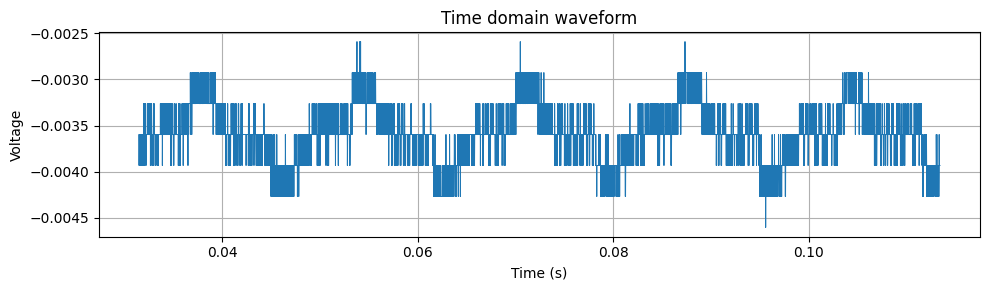

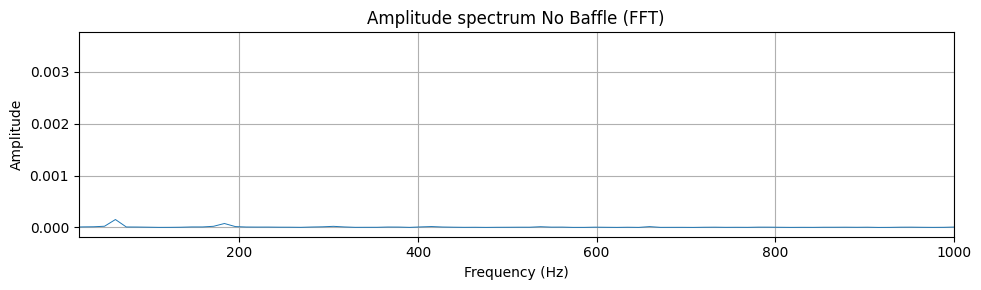

In [29]:
filepath = 'Combined_baf_nostim.csv'
try:
    df = pd.read_csv(filepath, header=19, encoding='utf-8')
except UnicodeDecodeError:
    # fallback to single-byte encodings if file isn't UTF-8
    for enc in ('latin1', 'cp1252'):
        try:
            df = pd.read_csv(filepath, header=19, encoding=enc)
            break
        except Exception:
            df = None
    if df is None:
        raise RuntimeError(f"Failed to read {filepath} with utf-8, latin1, or cp1252 encodings")

# Normalize/ensure column names are time,voltage
cols = [c.strip() for c in df.columns]
df.columns = cols
if set(cols) >= {'x', 'y'}:
    df = df.rename(columns={'x': 'time', 'y': 'voltage'})
elif set(cols) >= {'time', 'voltage'}:
    pass
else:
    # fallback: assume first two columns are time and voltage
    df = df.iloc[:, :2]
    df.columns = ['time', 'voltage']

time = df['time'].to_numpy()
voltage = df['voltage'].to_numpy()

# Plot time-domain signal
plt.figure(figsize=(10, 3))
plt.plot(time, voltage, linewidth=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('Time domain waveform')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute FFT
dt = np.mean(np.diff(time))           # sampling interval
fs = 1.0 / dt                         # sampling frequency
N = len(voltage)
yf = np.fft.rfft(voltage)
xf = np.fft.rfftfreq(N, d=dt)
amp = np.abs(yf) / N                  # amplitude spectrum (normalized)

# Plot amplitude spectrum
plt.figure(figsize=(10, 3))
plt.plot(xf, amp, linewidth=0.7)
plt.xlim(20, 1000)
#plt.ylim(0, 0.003)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectrum No Baffle (FFT)')
plt.grid(True)
plt.tight_layout()
plt.show()

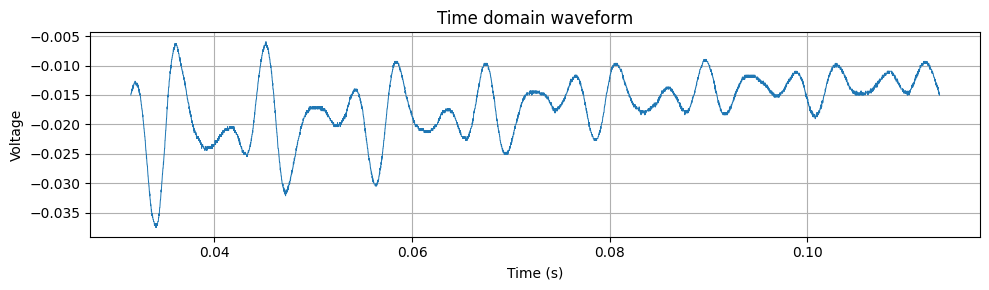

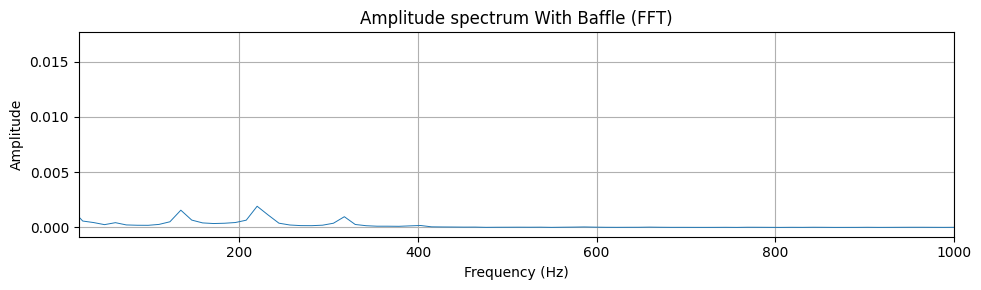

In [30]:
filepath = 'Combined_baf.csv'
try:
    df = pd.read_csv(filepath, header=19, encoding='utf-8')
except UnicodeDecodeError:
    # fallback to single-byte encodings if file isn't UTF-8
    for enc in ('latin1', 'cp1252'):
        try:
            df = pd.read_csv(filepath, header=19, encoding=enc)
            break
        except Exception:
            df = None
    if df is None:
        raise RuntimeError(f"Failed to read {filepath} with utf-8, latin1, or cp1252 encodings")

# Normalize/ensure column names are time,voltage
cols = [c.strip() for c in df.columns]
df.columns = cols
if set(cols) >= {'x', 'y'}:
    df = df.rename(columns={'x': 'time', 'y': 'voltage'})
elif set(cols) >= {'time', 'voltage'}:
    pass
else:
    # fallback: assume first two columns are time and voltage
    df = df.iloc[:, :2]
    df.columns = ['time', 'voltage']

time = df['time'].to_numpy()
voltage = df['voltage'].to_numpy()

# Plot time-domain signal
plt.figure(figsize=(10, 3))
plt.plot(time, voltage, linewidth=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('Time domain waveform')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute FFT
dt = np.mean(np.diff(time))           # sampling interval
fs = 1.0 / dt                         # sampling frequency
N = len(voltage)
yf = np.fft.rfft(voltage)
xf = np.fft.rfftfreq(N, d=dt)
amp = np.abs(yf) / N                  # amplitude spectrum (normalized)

# Plot amplitude spectrum
plt.figure(figsize=(10, 3))
plt.plot(xf, amp, linewidth=0.7)
plt.xlim(20, 1000)
#plt.ylim(0, 0.003)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectrum With Baffle (FFT)')
plt.grid(True)
plt.tight_layout()
plt.show()

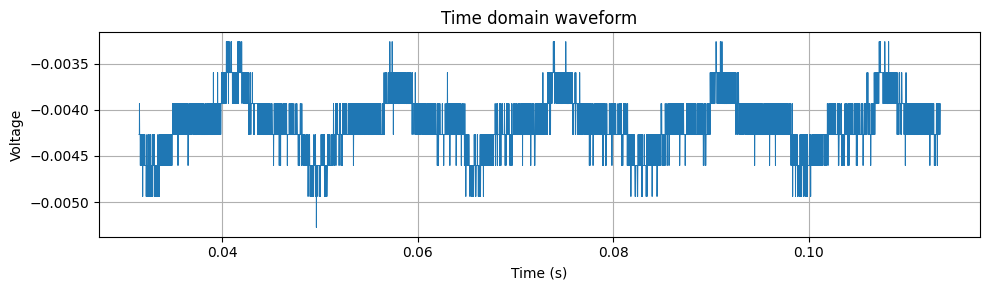

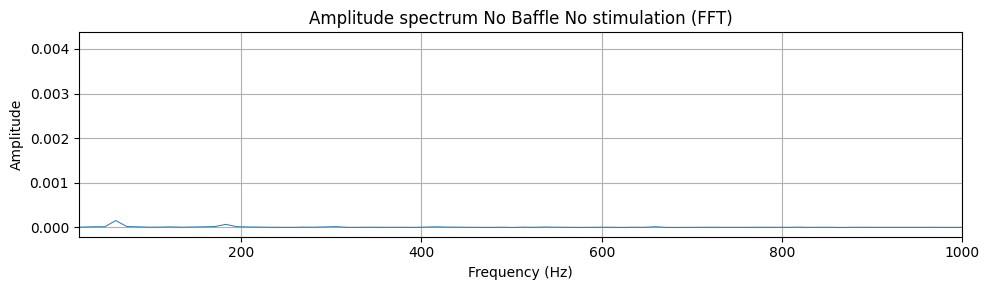

In [31]:
filepath = 'Combined_nobaf_nostim.csv'
try:
    df = pd.read_csv(filepath, header=19, encoding='utf-8')
except UnicodeDecodeError:
    # fallback to single-byte encodings if file isn't UTF-8
    for enc in ('latin1', 'cp1252'):
        try:
            df = pd.read_csv(filepath, header=19, encoding=enc)
            break
        except Exception:
            df = None
    if df is None:
        raise RuntimeError(f"Failed to read {filepath} with utf-8, latin1, or cp1252 encodings")

# Normalize/ensure column names are time,voltage
cols = [c.strip() for c in df.columns]
df.columns = cols
if set(cols) >= {'x', 'y'}:
    df = df.rename(columns={'x': 'time', 'y': 'voltage'})
elif set(cols) >= {'time', 'voltage'}:
    pass
else:
    # fallback: assume first two columns are time and voltage
    df = df.iloc[:, :2]
    df.columns = ['time', 'voltage']

time = df['time'].to_numpy()
voltage = df['voltage'].to_numpy()

# Plot time-domain signal
plt.figure(figsize=(10, 3))
plt.plot(time, voltage, linewidth=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('Time domain waveform')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute FFT
dt = np.mean(np.diff(time))           # sampling interval
fs = 1.0 / dt                         # sampling frequency
N = len(voltage)
yf = np.fft.rfft(voltage)
xf = np.fft.rfftfreq(N, d=dt)
amp = np.abs(yf) / N                  # amplitude spectrum (normalized)

# Plot amplitude spectrum
plt.figure(figsize=(10, 3))
plt.plot(xf, amp, linewidth=0.7)
plt.xlim(20, 1000)
#plt.ylim(0, 0.003)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectrum No Baffle No stimulation (FFT)')
plt.grid(True)
plt.tight_layout()
plt.show()

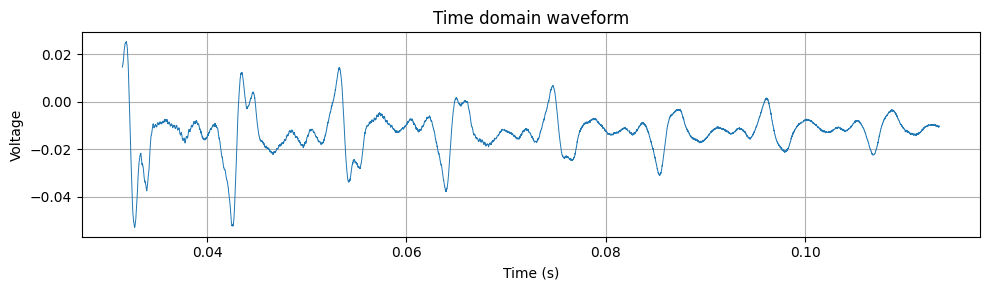

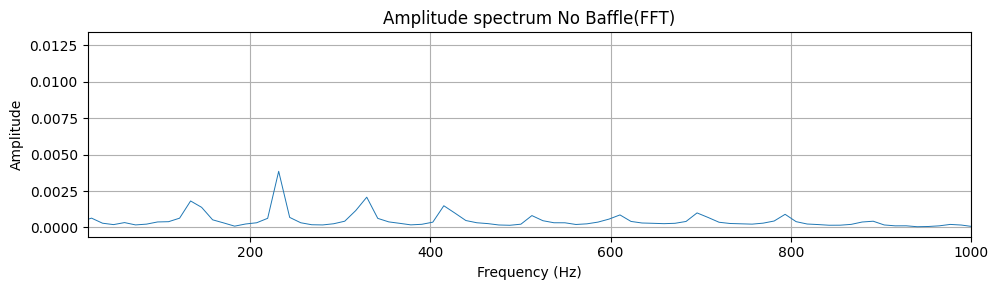

In [32]:
filepath = 'Combined_nobaf.csv'
try:
    df = pd.read_csv(filepath, header=19, encoding='utf-8')
except UnicodeDecodeError:
    # fallback to single-byte encodings if file isn't UTF-8
    for enc in ('latin1', 'cp1252'):
        try:
            df = pd.read_csv(filepath, header=19, encoding=enc)
            break
        except Exception:
            df = None
    if df is None:
        raise RuntimeError(f"Failed to read {filepath} with utf-8, latin1, or cp1252 encodings")

# Normalize/ensure column names are time,voltage
cols = [c.strip() for c in df.columns]
df.columns = cols
if set(cols) >= {'x', 'y'}:
    df = df.rename(columns={'x': 'time', 'y': 'voltage'})
elif set(cols) >= {'time', 'voltage'}:
    pass
else:
    # fallback: assume first two columns are time and voltage
    df = df.iloc[:, :2]
    df.columns = ['time', 'voltage']

time = df['time'].to_numpy()
voltage = df['voltage'].to_numpy()

# Plot time-domain signal
plt.figure(figsize=(10, 3))
plt.plot(time, voltage, linewidth=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('Time domain waveform')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute FFT
dt = np.mean(np.diff(time))           # sampling interval
fs = 1.0 / dt                         # sampling frequency
N = len(voltage)
yf = np.fft.rfft(voltage)
xf = np.fft.rfftfreq(N, d=dt)
amp = np.abs(yf) / N                  # amplitude spectrum (normalized)

# Plot amplitude spectrum
plt.figure(figsize=(10, 3))
plt.plot(xf, amp, linewidth=0.7)
plt.xlim(20, 1000)
#plt.ylim(0, 0.003)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectrum No Baffle(FFT)')
plt.grid(True)
plt.tight_layout()
plt.show()

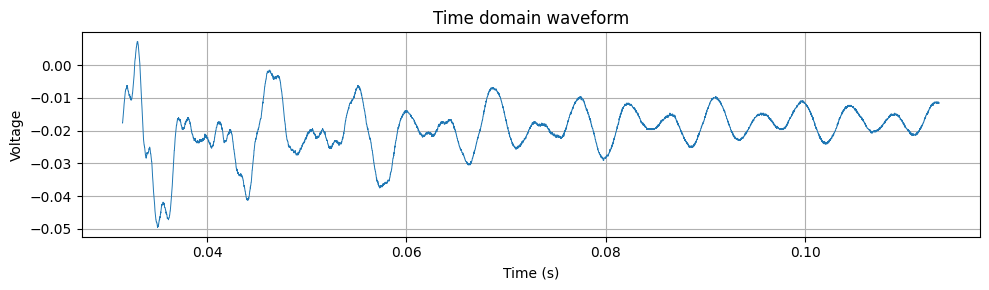

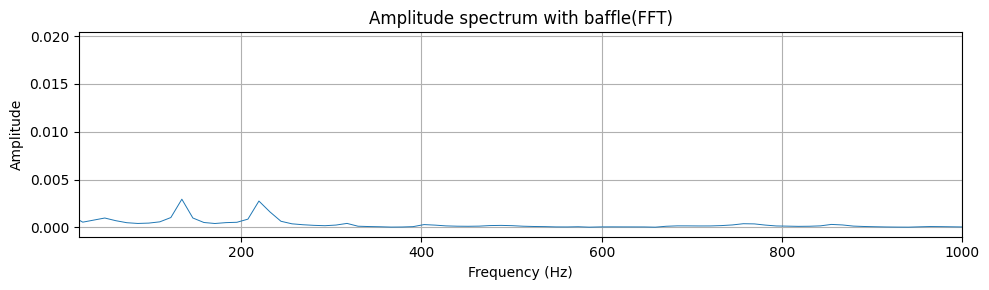

In [33]:
filepath = 'Combined_baf_2.csv'
try:
    df = pd.read_csv(filepath, header=19, encoding='utf-8')
except UnicodeDecodeError:
    # fallback to single-byte encodings if file isn't UTF-8
    for enc in ('latin1', 'cp1252'):
        try:
            df = pd.read_csv(filepath, header=19, encoding=enc)
            break
        except Exception:
            df = None
    if df is None:
        raise RuntimeError(f"Failed to read {filepath} with utf-8, latin1, or cp1252 encodings")

# Normalize/ensure column names are time,voltage
cols = [c.strip() for c in df.columns]
df.columns = cols
if set(cols) >= {'x', 'y'}:
    df = df.rename(columns={'x': 'time', 'y': 'voltage'})
elif set(cols) >= {'time', 'voltage'}:
    pass
else:
    # fallback: assume first two columns are time and voltage
    df = df.iloc[:, :2]
    df.columns = ['time', 'voltage']

time = df['time'].to_numpy()
voltage = df['voltage'].to_numpy()

# Plot time-domain signal
plt.figure(figsize=(10, 3))
plt.plot(time, voltage, linewidth=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('Time domain waveform')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute FFT
dt = np.mean(np.diff(time))           # sampling interval
fs = 1.0 / dt                         # sampling frequency
N = len(voltage)
yf = np.fft.rfft(voltage)
xf = np.fft.rfftfreq(N, d=dt)
amp = np.abs(yf) / N                  # amplitude spectrum (normalized)

# Plot amplitude spectrum
plt.figure(figsize=(10, 3))
plt.plot(xf, amp, linewidth=0.7)
plt.xlim(20, 1000)
#plt.ylim(0, 0.003)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectrum with baffle(FFT)')
plt.grid(True)
plt.tight_layout()
plt.show()

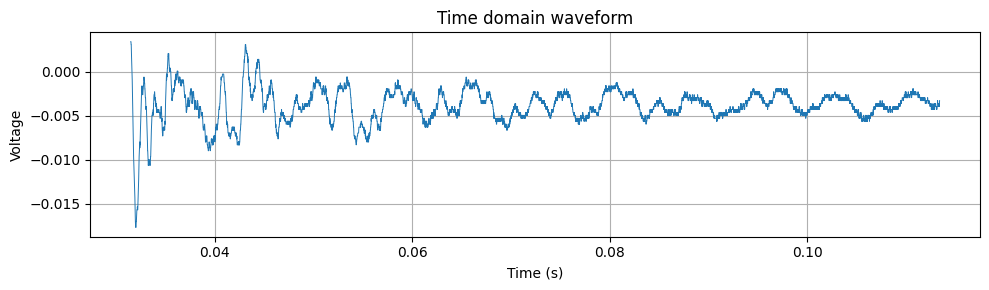

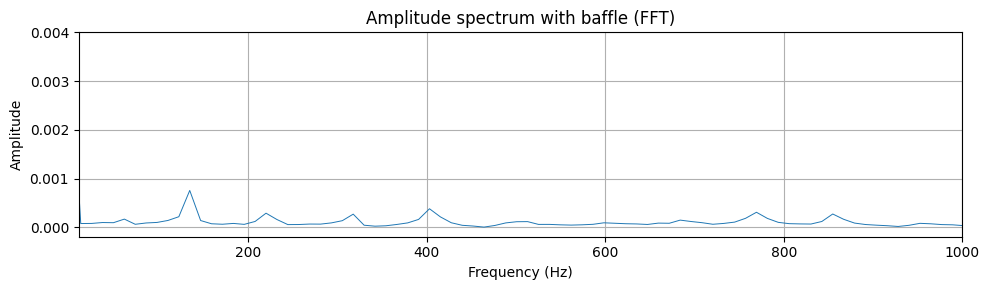

In [39]:
filepath = 'Combined_baf_long.csv'
try:
    df = pd.read_csv(filepath, header=19, encoding='utf-8')
except UnicodeDecodeError:
    # fallback to single-byte encodings if file isn't UTF-8
    for enc in ('latin1', 'cp1252'):
        try:
            df = pd.read_csv(filepath, header=19, encoding=enc)
            break
        except Exception:
            df = None
    if df is None:
        raise RuntimeError(f"Failed to read {filepath} with utf-8, latin1, or cp1252 encodings")

# Normalize/ensure column names are time,voltage
cols = [c.strip() for c in df.columns]
df.columns = cols
if set(cols) >= {'x', 'y'}:
    df = df.rename(columns={'x': 'time', 'y': 'voltage'})
elif set(cols) >= {'time', 'voltage'}:
    pass
else:
    # fallback: assume first two columns are time and voltage
    df = df.iloc[:, :2]
    df.columns = ['time', 'voltage']

time = df['time'].to_numpy()
voltage = df['voltage'].to_numpy()

# Plot time-domain signal
plt.figure(figsize=(10, 3))
plt.plot(time, voltage, linewidth=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('Time domain waveform')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute FFT
dt = np.mean(np.diff(time))           # sampling interval
fs = 1.0 / dt                         # sampling frequency
N = len(voltage)
yf = np.fft.rfft(voltage)
xf = np.fft.rfftfreq(N, d=dt)
amp = np.abs(yf) / N                  # amplitude spectrum (normalized)

# Plot amplitude spectrum
plt.figure(figsize=(10, 3))
plt.plot(xf, amp, linewidth=0.7)
plt.xlim(10, 1000)
#plt.ylim(0, 0.003)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectrum with baffle (FFT)')
plt.grid(True)
plt.tight_layout()
plt.show()

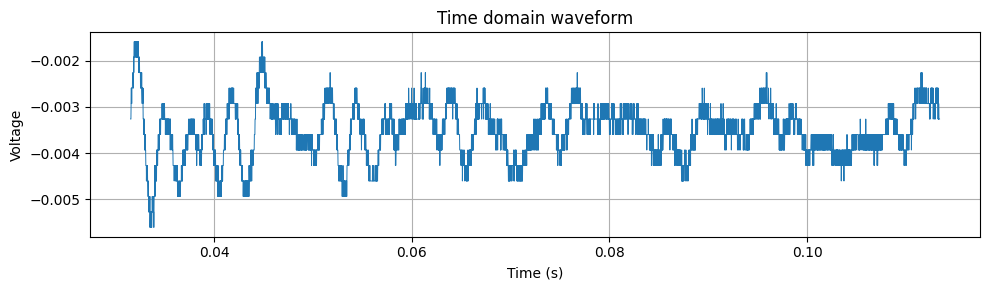

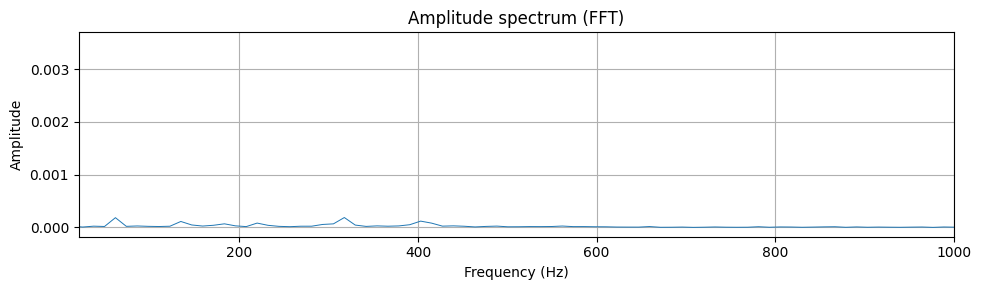

In [40]:
filepath = 'Combined_baf_3.csv'
try:
    df = pd.read_csv(filepath, header=19, encoding='utf-8')
except UnicodeDecodeError:
    # fallback to single-byte encodings if file isn't UTF-8
    for enc in ('latin1', 'cp1252'):
        try:
            df = pd.read_csv(filepath, header=19, encoding=enc)
            break
        except Exception:
            df = None
    if df is None:
        raise RuntimeError(f"Failed to read {filepath} with utf-8, latin1, or cp1252 encodings")

# Normalize/ensure column names are time,voltage
cols = [c.strip() for c in df.columns]
df.columns = cols
if set(cols) >= {'x', 'y'}:
    df = df.rename(columns={'x': 'time', 'y': 'voltage'})
elif set(cols) >= {'time', 'voltage'}:
    pass
else:
    # fallback: assume first two columns are time and voltage
    df = df.iloc[:, :2]
    df.columns = ['time', 'voltage']

time = df['time'].to_numpy()
voltage = df['voltage'].to_numpy()

# Plot time-domain signal
plt.figure(figsize=(10, 3))
plt.plot(time, voltage, linewidth=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('Time domain waveform')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute FFT
dt = np.mean(np.diff(time))           # sampling interval
fs = 1.0 / dt                         # sampling frequency
N = len(voltage)
yf = np.fft.rfft(voltage)
xf = np.fft.rfftfreq(N, d=dt)
amp = np.abs(yf) / N                  # amplitude spectrum (normalized)

# Plot amplitude spectrum
plt.figure(figsize=(10, 3))
plt.plot(xf, amp, linewidth=0.7)
plt.xlim(20, 1000)
#plt.ylim(0, 0.003)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectrum (FFT)')
plt.grid(True)
plt.tight_layout()
plt.show()

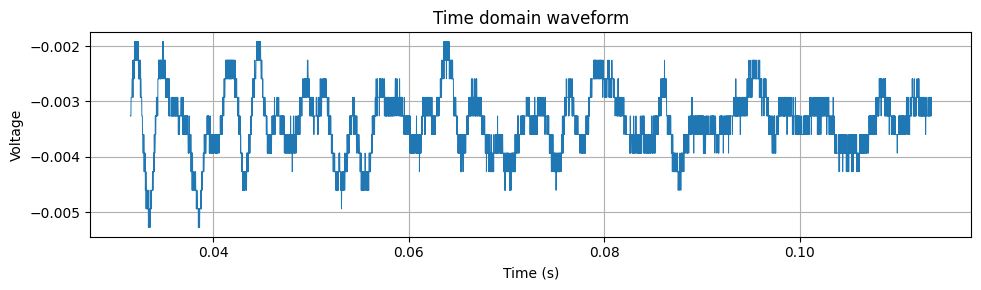

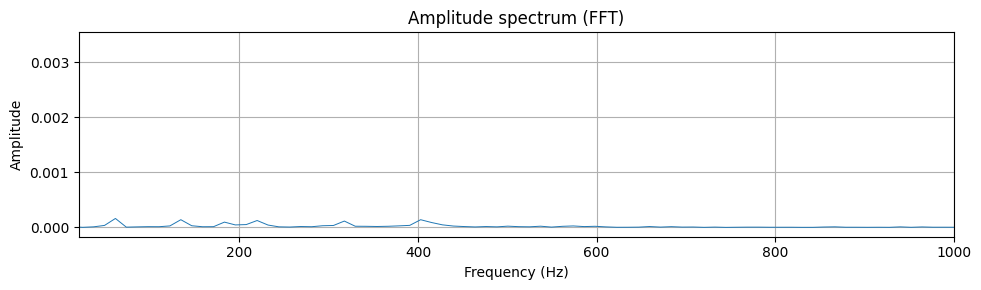

In [ ]:
filepath = 'Combined_baf_4.csv'
try:
    df = pd.read_csv(filepath, header=19, encoding='utf-8')
except UnicodeDecodeError:
    # fallback to single-byte encodings if file isn't UTF-8
    for enc in ('latin1', 'cp1252'):
        try:
            df = pd.read_csv(filepath, header=19, encoding=enc)
            break
        except Exception:
            df = None
    if df is None:
        raise RuntimeError(f"Failed to read {filepath} with utf-8, latin1, or cp1252 encodings")

# Normalize/ensure column names are time,voltage
cols = [c.strip() for c in df.columns]
df.columns = cols
if set(cols) >= {'x', 'y'}:
    df = df.rename(columns={'x': 'time', 'y': 'voltage'})
elif set(cols) >= {'time', 'voltage'}:
    pass
else:
    # fallback: assume first two columns are time and voltage
    df = df.iloc[:, :2]
    df.columns = ['time', 'voltage']

time = df['time'].to_numpy()
voltage = df['voltage'].to_numpy()

# Plot time-domain signal
plt.figure(figsize=(10, 3))
plt.plot(time, voltage, linewidth=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('Time domain waveform')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute FFT
dt = np.mean(np.diff(time))           # sampling interval
fs = 1.0 / dt                         # sampling frequency
N = len(voltage)
yf = np.fft.rfft(voltage)
xf = np.fft.rfftfreq(N, d=dt)
amp = np.abs(yf) / N                  # amplitude spectrum (normalized)

# Plot amplitude spectrum
plt.figure(figsize=(10, 3))
plt.plot(xf, amp, linewidth=0.7)
plt.xlim(20, 1000)
#plt.ylim(0, 0.003)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectrum With Baffle(FFT)')
plt.grid(True)
plt.tight_layout()
plt.show()

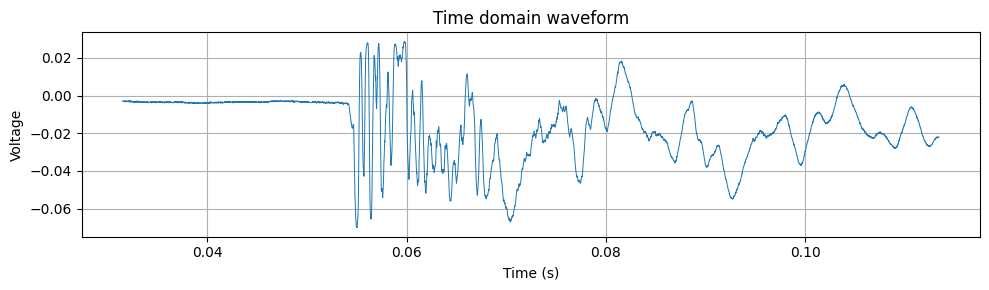

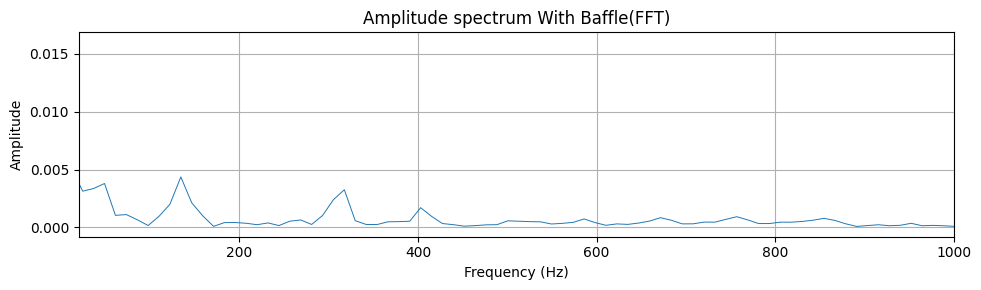

In [44]:
filepath = 'Combined_baf_5.csv'
try:
    df = pd.read_csv(filepath, header=19, encoding='utf-8')
except UnicodeDecodeError:
    # fallback to single-byte encodings if file isn't UTF-8
    for enc in ('latin1', 'cp1252'):
        try:
            df = pd.read_csv(filepath, header=19, encoding=enc)
            break
        except Exception:
            df = None
    if df is None:
        raise RuntimeError(f"Failed to read {filepath} with utf-8, latin1, or cp1252 encodings")

# Normalize/ensure column names are time,voltage
cols = [c.strip() for c in df.columns]
df.columns = cols
if set(cols) >= {'x', 'y'}:
    df = df.rename(columns={'x': 'time', 'y': 'voltage'})
elif set(cols) >= {'time', 'voltage'}:
    pass
else:
    # fallback: assume first two columns are time and voltage
    df = df.iloc[:, :2]
    df.columns = ['time', 'voltage']

time = df['time'].to_numpy()
voltage = df['voltage'].to_numpy()

# Plot time-domain signal
plt.figure(figsize=(10, 3))
plt.plot(time, voltage, linewidth=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('Time domain waveform')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute FFT
dt = np.mean(np.diff(time))           # sampling interval
fs = 1.0 / dt                         # sampling frequency
N = len(voltage)
yf = np.fft.rfft(voltage)
xf = np.fft.rfftfreq(N, d=dt)
amp = np.abs(yf) / N                  # amplitude spectrum (normalized)

# Plot amplitude spectrum
plt.figure(figsize=(10, 3))
plt.plot(xf, amp, linewidth=0.7)
plt.xlim(20, 1000)
#plt.ylim(0, 0.003)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectrum With Baffle(FFT)')
plt.grid(True)
plt.tight_layout()
plt.show()

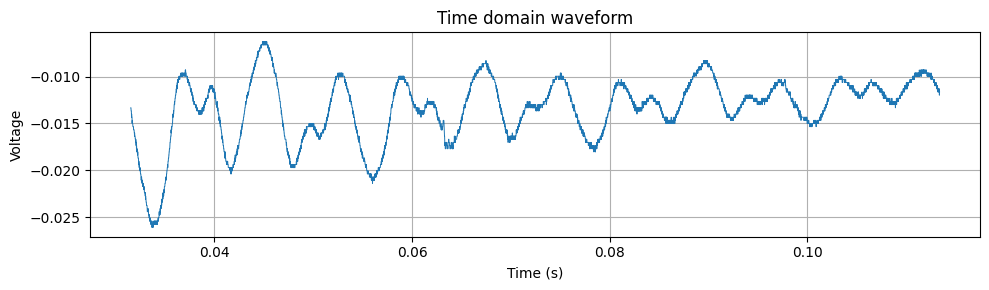

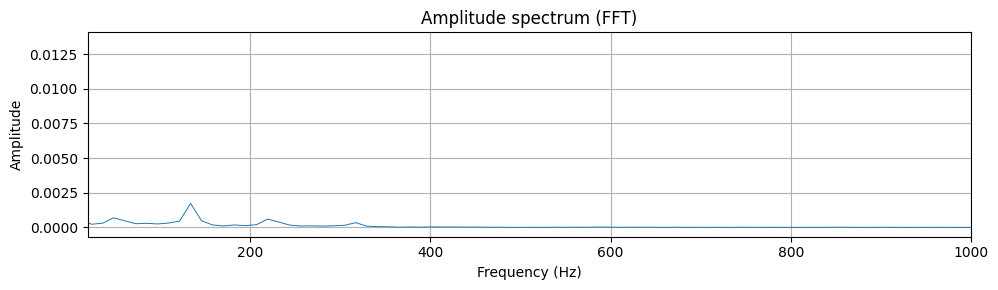

In [43]:
filepath = 'Combined_baf_raised.csv'
try:
    df = pd.read_csv(filepath, header=19, encoding='utf-8')
except UnicodeDecodeError:
    # fallback to single-byte encodings if file isn't UTF-8
    for enc in ('latin1', 'cp1252'):
        try:
            df = pd.read_csv(filepath, header=19, encoding=enc)
            break
        except Exception:
            df = None
    if df is None:
        raise RuntimeError(f"Failed to read {filepath} with utf-8, latin1, or cp1252 encodings")

# Normalize/ensure column names are time,voltage
cols = [c.strip() for c in df.columns]
df.columns = cols
if set(cols) >= {'x', 'y'}:
    df = df.rename(columns={'x': 'time', 'y': 'voltage'})
elif set(cols) >= {'time', 'voltage'}:
    pass
else:
    # fallback: assume first two columns are time and voltage
    df = df.iloc[:, :2]
    df.columns = ['time', 'voltage']

time = df['time'].to_numpy()
voltage = df['voltage'].to_numpy()

# Plot time-domain signal
plt.figure(figsize=(10, 3))
plt.plot(time, voltage, linewidth=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('Time domain waveform')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute FFT
dt = np.mean(np.diff(time))           # sampling interval
fs = 1.0 / dt                         # sampling frequency
N = len(voltage)
yf = np.fft.rfft(voltage)
xf = np.fft.rfftfreq(N, d=dt)
amp = np.abs(yf) / N                  # amplitude spectrum (normalized)

# Plot amplitude spectrum
plt.figure(figsize=(10, 3))
plt.plot(xf, amp, linewidth=0.7)
plt.xlim(20, 1000)
#plt.ylim(0, 0.003)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectrum (FFT)')
plt.grid(True)
plt.tight_layout()
plt.show()